In [2]:
import pandas as pd
import numpy as np
import scipy as sp

from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import sklearn 
# Import matplotlib
import matplotlib.pyplot as plt

In [78]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('C:\\Users\\taniy\\OneDrive\\Documents\\proj jupyter\\creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
190833,128998.0,2.041544,-0.144772,-2.955160,-0.578916,2.610039,3.142393,-0.417798,0.784572,0.359984,...,-0.352752,-0.996573,0.364093,0.604791,-0.264306,0.219744,-0.039079,-0.042907,1.29,0
32818,36976.0,1.124371,-0.190484,1.354920,0.793576,-1.113791,-0.089758,-0.709769,0.195886,0.626485,...,-0.024379,0.096224,0.041888,0.589697,0.204081,0.285645,0.014653,0.019657,8.94,0
190179,128727.0,-1.188129,1.919761,-1.696294,-0.123108,0.616486,-1.812508,0.387103,0.529756,-0.325118,...,0.228845,0.570801,-0.227048,-0.230647,0.223449,-0.139821,-0.161042,0.022871,1.00,0
117966,74892.0,-2.051857,-1.991462,0.603521,-0.661185,1.737160,-1.563062,0.642126,-0.216694,-0.142817,...,0.309700,0.286265,0.754444,0.066954,-0.262150,0.800110,-0.010989,0.043916,252.00,0
101293,67784.0,-0.959191,0.418975,3.244238,1.562318,-0.453058,0.708754,-0.262098,0.151441,0.753523,...,-0.014476,0.454564,-0.307117,0.431709,0.106634,-0.176862,-0.256702,-0.092377,1.00,0


In [56]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [28]:
df.isna().sum().sum() # no null value nor NAN along both x and y axis

0

In [27]:
df.isnull().sum().sum() # no null value nor NAN

0

In [26]:
df.any().sum() # all entries has numbers

31

In [35]:
df['Class'].unique() # checks for unique entries in the column class which is binary here

array([0, 1], dtype=int64)

Text(0, 0.5, 'V2')

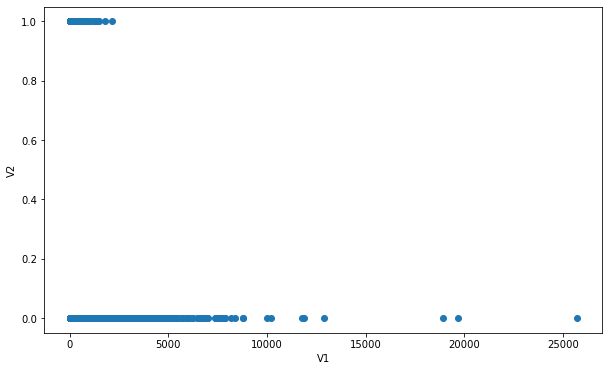

In [54]:
plt.figure(figsize=(10,6))

plt.scatter(df['Amount'], df['Class'], label = "label_name" )
plt.xlabel('V1')
plt.ylabel('V2')

In [50]:
df_corr=df.corr()
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173867e-01,-1.059957e-02,-0.081124,-1.052815e-01,0.173053,-6.300267e-02,0.084686,-3.695229e-02,-0.005874,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117387,1.000000e+00,2.099285e-05,0.001029,9.529111e-06,-0.000004,2.122112e-07,-0.000009,-2.854228e-05,0.001014,...,4.587142e-05,-1.223520e-05,9.965740e-06,1.316912e-05,-1.226418e-05,1.350234e-05,-6.828145e-06,1.906924e-06,-0.227712,-0.101348
V2,-0.010600,2.099285e-05,1.000000e+00,0.000017,-8.131144e-06,-0.000011,8.839326e-06,0.000008,2.445678e-06,0.000289,...,1.124019e-06,-6.572876e-06,-7.517717e-06,-4.948146e-06,7.387339e-06,1.187097e-05,8.841818e-06,5.805731e-06,-0.531397,0.091289
V3,-0.081124,1.029056e-03,1.700327e-05,1.000000,1.775727e-03,-0.000791,-3.435704e-04,-0.000233,1.391118e-04,0.000510,...,-5.594870e-04,-1.285199e-03,3.159068e-04,1.097876e-03,1.225056e-03,-2.039354e-03,2.110161e-04,1.425350e-04,-0.040070,-0.036315
V4,-0.105281,9.529111e-06,-8.131144e-06,0.001776,1.000000e+00,-0.000017,1.334830e-05,-0.000006,-1.185010e-06,0.001403,...,-1.353019e-06,-7.704835e-06,-6.274151e-06,-9.433062e-06,2.875012e-06,2.005382e-06,-3.610486e-07,3.161128e-06,0.098740,0.133448
V5,0.173053,-3.734539e-06,-1.093661e-05,-0.000791,-1.650177e-05,1.000000,-1.113178e-05,-0.000031,1.110916e-06,-0.000191,...,4.649343e-06,2.508405e-05,-5.111865e-06,1.402889e-05,4.348084e-06,-3.553747e-06,4.284871e-06,1.766928e-06,-0.386365,-0.094976
V6,-0.063003,2.122112e-07,8.839326e-06,-0.000344,1.334830e-05,-0.000011,1.000000e+00,0.000025,-1.601478e-05,-0.000519,...,-9.812268e-07,3.159812e-06,-2.293193e-06,6.076880e-06,4.408423e-07,-8.058947e-06,7.758653e-07,9.462055e-06,0.215984,-0.043644
V7,0.084686,-8.680696e-06,8.213032e-06,-0.000233,-5.735542e-06,-0.000031,2.518686e-05,1.000000,-6.669264e-05,0.000068,...,1.053632e-04,-3.528548e-05,1.649208e-05,2.251294e-06,1.920311e-06,2.464782e-05,1.511463e-05,1.192179e-05,0.397313,-0.187260
V8,-0.036952,-2.854228e-05,2.445678e-06,0.000139,-1.185010e-06,0.000001,-1.601478e-05,-0.000067,1.000000e+00,-0.000076,...,-1.148575e-07,-1.332754e-06,-4.573008e-07,-3.140921e-06,-5.690898e-07,3.726254e-06,-2.130973e-07,5.636829e-07,-0.103079,0.019875
V9,-0.005874,1.014420e-03,2.887116e-04,0.000510,1.402792e-03,-0.000191,-5.188687e-04,0.000068,-7.643358e-05,1.000000,...,2.248217e-04,8.320249e-04,-2.130988e-04,2.240255e-04,1.930517e-03,-8.747166e-04,1.391321e-04,9.828377e-05,-0.019704,-0.042376


<AxesSubplot:>

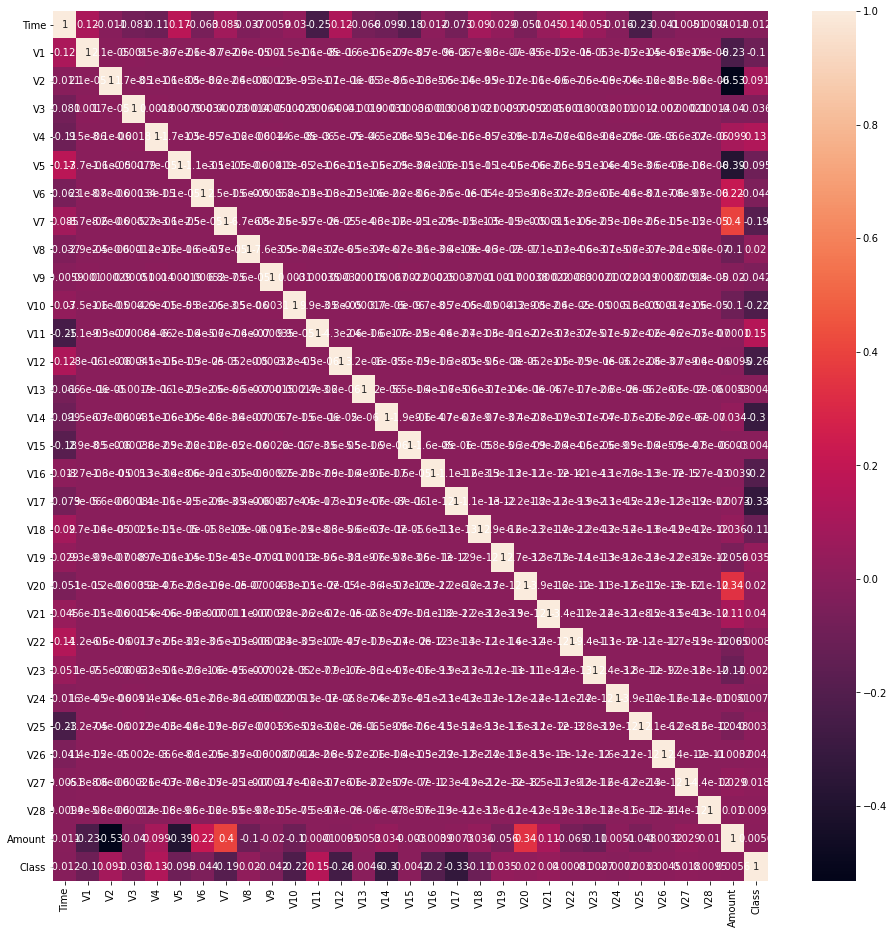

In [53]:
fig, ax=plt.subplots(figsize=(16,16))
sns.heatmap(df_corr, annot = True)

In [61]:
df['Class']  = df['Class'].astype(object)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [75]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,0.000017,0.000008,0.014970,0.000023,0.000022,-0.000016,0.000029,0.000003,0.004311,...,1.766044e-12,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619
std,47488.145955,1.958679,1.651295,8.073856,1.415859,1.380234,1.332244,1.237076,1.194354,2.538010,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-0.920327,-0.598532,-0.890365,-0.848611,-0.691568,-0.768290,-0.554011,-0.208630,-0.643068,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,0.018027,0.065467,0.179832,-0.019816,-0.054314,-0.274159,0.040104,0.022358,-0.051331,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315632,0.803724,1.027212,0.743355,0.611926,0.398487,0.570450,0.327349,0.597139,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930,22.057729,4232.000000,16.875344,34.801666,73.301626,120.589494,20.007208,1221.000000,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [4]:
ros = RandomOverSampler(sampling_strategy = 'minority') # string
# ros = RandomOverSampler(sampling_strategy=1) # Float

In [5]:
X=df.drop(['Class'], axis=1 )
Y= df['Class']
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [6]:
Y=Y.astype('int') 
X_res , y_res = ros.fit_resample(X, Y)
X_res.shape

(568630, 30)

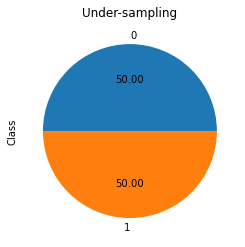

In [8]:
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res , test_size=0.2)

In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [10]:
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9996482774387563

In [12]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

1.0

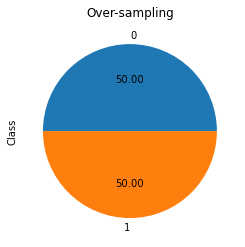

In [13]:

from imblearn.over_sampling import SMOTE
ros1 = SMOTE()

X_res1 , y_res1 = ros1.fit_resample(X, Y)
ax1 = y_res1.value_counts().plot.pie(autopct='%.2f')
_ = ax1.set_title("Over-sampling")

In [14]:

x_train1, x_test1, y_train1, y_test1 = train_test_split(X_res1, y_res1 , test_size=0.1)

model1 = tree.DecisionTreeClassifier()# default is 
model1.fit(x_train1, y_train1)


DecisionTreeClassifier()

In [19]:
y_pred1 = model.predict(x_test1)

recall_score(y_test1, y_pred1)

0.8402246402246403

In [32]:
modelentropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
modelentropy.fit(x_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [33]:
y_pred2 = modelentropy.predict(x_test1)

recall_score(y_test1, y_pred2)


0.9150930150930151

In [ ]:


accuracy_score(y_test1, y_pred1)

accuracy_score(y_test1, y_pred2)

In [40]:
# RAndom Forest
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(n_estimators = 5)# default is 10
model_RF.fit(x_train1, y_train1)

RandomForestClassifier(n_estimators=5)

In [41]:
y_pred_RF =model_RF.predict(x_test1)

recall_score(y_test1, y_pred_RF)

0.9999297999297999

In [44]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver= 'liblinear')

In [45]:
log_model.fit(x_train1, y_train1)

LogisticRegression(solver='liblinear')

In [46]:
log_model.score(x_train1, y_train1)

0.971614035293405

In [48]:
y_pred_logistic = log_model.predict(x_test1)

recall_score(y_test1, y_pred_logistic)

0.9594243594243594

In [53]:
comparison_frme = pd.DataFrame( {'Actual Y': y_test1, 'y_DecisionTreegini':y_pred1 ,  'y_DecisionTreeEntropy':y_pred2  ,'y_pred_RandomForest': y_pred_RF, 'y_pred_logistic': y_pred_logistic})
comparison_frme

,Actual Y,y_DecisionTreegini,y_DecisionTreeEntropy,y_pred_RandomForest,y_pred_logistic
204167,0,0,0,0,0
92167,0,0,0,0,0
476556,1,1,1,1,1
371049,1,0,0,1,1
18163,0,0,0,0,0
...,...,...,...,...,...
474148,1,1,1,1,1
144252,0,0,0,0,0
552910,1,1,1,1,1
312513,1,0,0,1,0
